## Part 3 - Handling with Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_origin = pd.read_csv("auto_scout_filled.csv")

In [3]:
df = df_origin.copy()

In [4]:
df.head()

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
0,Audi A1,Sedans,15770,VAT deductible,56013.0,66.0,Used,2.0,Yes,Metallic,5.0,5.0,Automatic,1422.0,3.0,1220.0,front,Diesel,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,3.0,Cloth,Black,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,141.0,Used,1.0,No,Metallic,3.0,4.0,Automatic,1798.0,4.0,1255.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,Cloth,Grey,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,85.0,Used,1.0,No,Metallic,4.0,4.0,Automatic,1598.0,3.0,1255.0,front,Diesel,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,3.0,Cloth,Black,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,66.0,Used,1.0,No,Metallic,3.0,4.0,Automatic,1422.0,3.0,1195.0,front,Diesel,99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,Cloth,Black,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,66.0,Used,1.0,Yes,Metallic,5.0,5.0,Automatic,1422.0,3.0,1195.0,front,Diesel,109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.0,3.0,Cloth,Black,4.1


In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make_model,15919,9,Audi A3,3097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_type,15919,9,Sedans,7925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price(€),15919.0,NaN,NaN,NaN,18019.896727,7386.169409,13.0,12850.0,16900.0,21900.0,74600.0
vat,15919,2,VAT deductible,14972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km,15919.0,NaN,NaN,NaN,36916.225547,37661.7388,0.0,6437.0,24764.0,61119.0,317000.0
hp(kw),15919.0,NaN,NaN,NaN,88.372385,26.840256,1.0,66.0,85.0,101.0,294.0
type,15919,5,Used,11098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_owners,15919.0,NaN,NaN,NaN,1.058169,0.314867,0.0,1.0,1.0,1.0,4.0
inspection_new,15919,2,No,11987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_type,15919,3,Metallic,15255,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.select_dtypes([np.number]).columns

Index(['price(€)', 'km', 'hp(kw)', 'previous_owners', 'num_of_door',
       'num_of_seat', 'displacement(cc)', 'cylinders', 'weight(kg)',
       'co2_emission(g/km)', 'gears', 'age', 'consumption_comb(100km/l)'],
      dtype='object')

### 1- price(€) column

In [7]:
df["price(€)"].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price(€), dtype: float64

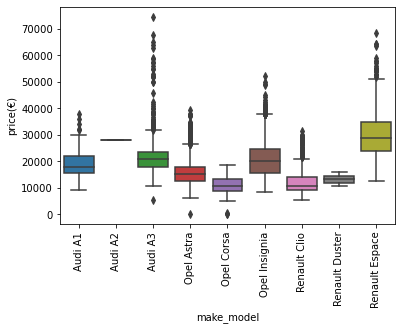

In [8]:
sns.boxplot(data=df, x="make_model", y="price(€)")
plt.xticks(rotation=90);

##### Audi A3

In [9]:
q3, q1 = np.percentile(df[df["make_model"] == "Audi A3"]["price(€)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(31900.0, 9500.0)

In [10]:
df[df["make_model"] == "Audi A3"][(df["price(€)"] > upper_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
3648,Audi A3,Sedans,74600,VAT deductible,13000.0,294.0,Used,1.0,No,Metallic,4.0,5.0,Semi-automatic,2480.0,5.0,1490.0,4WD,Benzine,188.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",7.0,1.0,Full leather,Grey,8.3
3649,Audi A3,Compact,67600,VAT deductible,37747.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1485.0,4WD,Benzine,189.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.0,2.0,Full leather,Black,8.3
3587,Audi A3,Sedans,64900,VAT deductible,35000.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1585.0,front,Benzine,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,1.0,Full leather,Black,8.3


In [11]:
df[df["make_model"] == "Audi A3"][(df["price(€)"] < lower_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
3235,Audi A3,Station wagon,5555,VAT deductible,5558.0,110.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1968.0,4.0,1465.0,front,Diesel,127.0,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.0,1.0,Cloth,Grey,4.8


In [12]:
df.drop(index=[3648,3235], inplace=True)

##### Opel Astra

In [13]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Astra"]["price(€)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [14]:
df[df["make_model"] == "Opel Astra"][(df["price(€)"] > upper_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
7626,Opel Astra,Compact,39433,VAT deductible,1.0,147.0,New,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1278.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,On-board co...","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.0,0.0,alcantara,Black,6.4
7627,Opel Astra,Compact,37995,VAT deductible,10.0,147.0,New,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1325.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio",Alloy wheels,"Central door lock,Driver-side airbag,Electroni...",6.0,0.0,Full leather,Black,5.1
7629,Opel Astra,Compact,37995,VAT deductible,10.0,147.0,New,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1325.0,front,Benzine,149.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio",Alloy wheels,"Central door lock,Driver-side airbag,Electroni...",6.0,0.0,Full leather,Black,5.9


In [15]:
df[df["make_model"] == "Opel Astra"][(df["price(€)"] < lower_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
6066,Opel Astra,Station wagon,255,VAT deductible,5563.0,100.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1598.0,4.0,1403.0,front,Diesel,101.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,1.0,Cloth,Grey,3.8


In [16]:
df.drop(index=6066, inplace=True)

##### Opel Corsa

In [17]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Corsa"]["price(€)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(20732.5, 1432.5)

In [18]:
df[df["make_model"] == "Opel Corsa"][(df["price(€)"] > upper_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)


In [19]:
df[df["make_model"] == "Opel Corsa"][(df["price(€)"] < lower_bound)].sort_values(by="price(€)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
8829,Opel Corsa,Other,331,VAT deductible,10.0,66.0,New,1.0,No,Metallic,5.0,5.0,Manual,999.0,3.0,1163.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,Cloth,Black,5.2
8828,Opel Corsa,Compact,120,VAT deductible,12.0,66.0,New,1.0,No,Metallic,5.0,5.0,Manual,999.0,3.0,1099.0,front,Benzine,107.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,0.0,Cloth,Black,4.6
8594,Opel Corsa,Sedans,13,VAT deductible,123.0,66.0,Used,1.0,No,Metallic,3.0,5.0,Manual,1398.0,4.0,1141.0,front,Benzine,128.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,1.0,Cloth,Black,5.6


In [20]:
df.drop(index=[8829, 8828, 2594], inplace=True)

##### Renault Escape

In [21]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Espace"]["price(€)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(51587.5, 7287.5)

In [22]:
df[df["make_model"] == "Renault Espace"][(df["price(€)"] > upper_bound)].sort_values(by="price(€)", ascending=False)[:6]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
15826,Renault Espace,Van,68320,VAT deductible,4307.0,118.0,Demonstration,1.0,No,Metallic,5.0,4.0,Automatic,1598.0,4.0,1647.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,0.0,Full leather,Brown,6.5
15828,Renault Espace,Van,64332,VAT deductible,1.0,165.0,New,1.0,No,Metallic,5.0,7.0,Automatic,1798.0,4.0,1647.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",9.0,0.0,Full leather,Brown,7.6
15831,Renault Espace,Van,64298,VAT deductible,15.0,165.0,New,1.0,No,Metallic,5.0,7.0,Automatic,1798.0,4.0,1647.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.0,0.0,Full leather,Grey,7.6
15833,Renault Espace,Van,63477,VAT deductible,8.0,147.0,New,1.0,No,Metallic,5.0,7.0,Automatic,1618.0,4.0,1621.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",7.0,0.0,Cloth,Brown,6.8
15808,Renault Espace,Van,58950,VAT deductible,1136.0,165.0,Demonstration,1.0,No,Metallic,5.0,7.0,Automatic,1798.0,4.0,1624.0,front,Benzine,152.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Alarm system,Blind...",7.0,0.0,Full leather,Brown,6.8
15807,Renault Espace,Van,57990,VAT deductible,5000.0,165.0,Demonstration,1.0,No,Metallic,5.0,5.0,Automatic,1798.0,4.0,1647.0,4WD,Benzine,174.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7.0,0.0,Full leather,Brown,7.6


##### Audi A2

In [23]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,85.0,Employee's car,1.0,No,Metallic,5.0,5.0,Manual,1598.0,3.0,1340.0,front,Diesel,106.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.0,1.0,Cloth,Black,4.9


In [24]:
# there is only one row. because of this i will drop this row.

In [25]:
df.drop(index=2614, inplace=True)

### 2- km column

In [26]:
df["km"].describe()

count     15912.000000
mean      36929.109193
std       37664.579611
min           0.000000
25%        6449.500000
50%       24771.500000
75%       61168.750000
max      317000.000000
Name: km, dtype: float64

<AxesSubplot:xlabel='age', ylabel='km'>

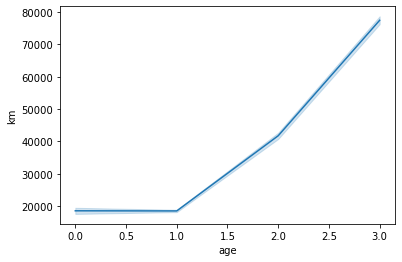

In [27]:
sns.lineplot(data=df, x="age", y="km")

<AxesSubplot:xlabel='make_model', ylabel='km'>

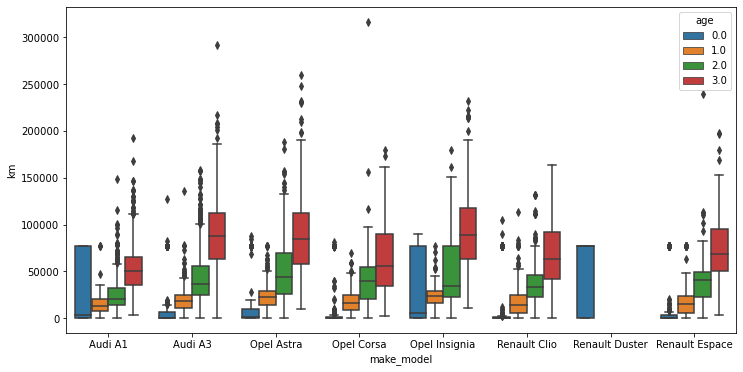

In [28]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x="make_model", y="km", hue="age")

<AxesSubplot:xlabel='make_model', ylabel='km'>

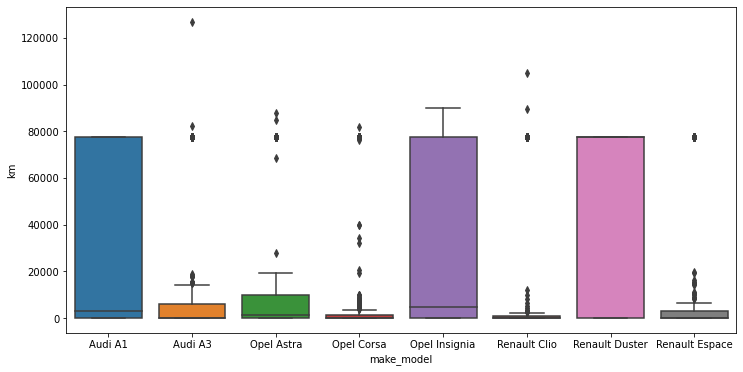

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["age"] == 0], x="make_model", y="km")

In [30]:
# I don't know how to deal with km column because there is no standart. It depends on person's life style maybe...
# So I won't do anything to km column

### 3- hp(kw) column

In [31]:
df["hp(kw)"].corr(df["price(€)"])

0.6937223765827459

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

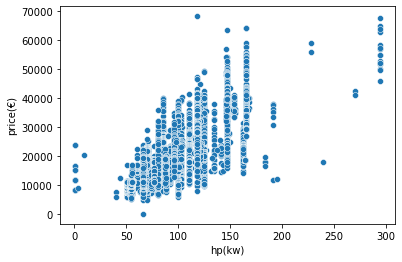

In [32]:
sns.scatterplot(data=df, x="hp(kw)", y="price(€)")

In [33]:
df["hp(kw)"].describe()

count    15912.000000
mean        88.360608
std         26.794709
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp(kw), dtype: float64

<AxesSubplot:xlabel='make_model', ylabel='hp(kw)'>

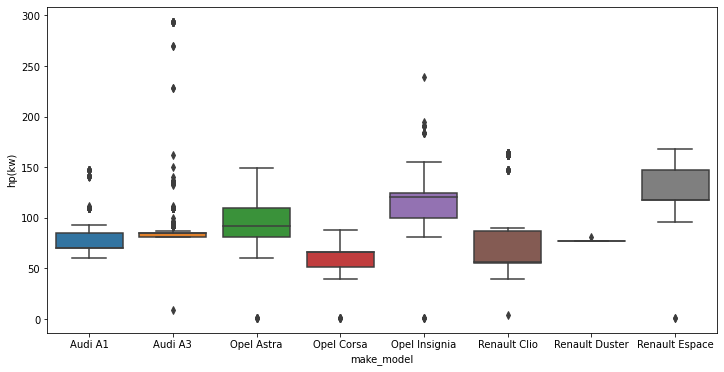

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="hp(kw)")

##### Audi A1

<AxesSubplot:xlabel='hp(kw)', ylabel='make_model'>

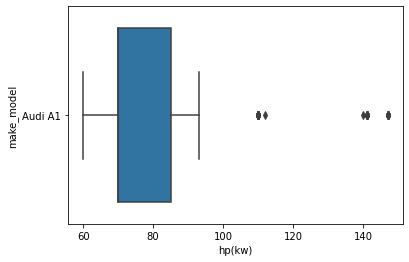

In [35]:
sns.boxplot(data=df[df["make_model"]=="Audi A1"], y="make_model", x="hp(kw)")

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

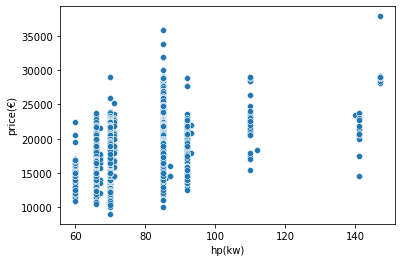

In [36]:
sns.scatterplot(data=df[df["make_model"]=="Audi A1"], x="hp(kw)", y="price(€)")

In [37]:
q3, q1 = np.percentile(df[df["make_model"] == "Audi A1"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(107.5, 47.5)

In [38]:
df[df["make_model"] == "Audi A1"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
2390,Audi A1,Compact,28997,VAT deductible,1500.00,147.0,Demonstration,1.0,Yes,Metallic,5.0,5.0,Automatic,1984.0,4.0,1335.0,front,Benzine,136.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport package,Sport seats,Touch s...","ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Cloth,Black,6.0
2347,Audi A1,Sedans,28990,VAT deductible,4900.00,147.0,Demonstration,1.0,Yes,Metallic,4.0,5.0,Automatic,1984.0,4.0,1335.0,front,Benzine,136.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Daytime running lights,Driver-side airbag,...",6.0,0.0,Cloth,Grey,6.0
1926,Audi A1,Compact,28560,VAT deductible,10.00,147.0,New,1.0,No,Metallic,4.0,5.0,Automatic,1984.0,4.0,1335.0,front,Benzine,142.0,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,Sound...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Part leather,Black,6.0
1928,Audi A1,Compact,28200,VAT deductible,77442.52,147.0,New,1.0,No,Metallic,5.0,5.0,Automatic,1984.0,4.0,1180.0,front,Benzine,123.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Part leather,Black,6.0
1958,Audi A1,Compact,28460,VAT deductible,9999.00,147.0,Demonstration,1.0,No,Metallic,5.0,5.0,Automatic,1984.0,3.0,1200.0,front,Benzine,137.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Cloth,Grey,6.0
2174,Audi A1,Compact,28860,VAT deductible,77442.52,147.0,New,1.0,No,Metallic,5.0,5.0,Automatic,1984.0,4.0,1180.0,front,Benzine,137.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",6.0,0.0,Cloth,Grey,6.0
2176,Audi A1,Sedans,28880,VAT deductible,3100.00,147.0,Demonstration,1.0,Yes,Metallic,4.0,5.0,Automatic,1984.0,3.0,1200.0,front,Benzine,136.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Cloth,Grey,6.0
2173,Audi A1,Sedans,28880,VAT deductible,4999.00,147.0,Demonstration,1.0,No,Metallic,5.0,5.0,Automatic,1984.0,3.0,1200.0,front,Benzine,136.0,Euro 6,"Electrical side mirrors,Power windows",On-board computer,"Catalytic Converter,Sport package,Sport suspen...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,0.0,Cloth,Grey,6.0
713,Audi A1,Sedans,37900,VAT deductible,7000.00,147.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,1984.0,4.0,1240.0,front,Benzine,136.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio","Alloy wheels,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",6.0,0.0,Cloth,Grey,6.0
2357,Audi A1,Compact,28940,VAT deductible,10.00,147.0,New,1.0,No,Metallic,4.0,5.0,Automatic,1984.0,4.0,1335.0,front,Benzine,142.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,S...","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",7.0,0.0,Part leather,Black,6.0


In [39]:
df[df["make_model"] == "Audi A1"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)[:6]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)


In [40]:
df.loc[(df["make_model"] == "Audi A1") & (df["hp(kw)"] > 120), "hp(kw)"] =np.nan

<AxesSubplot:xlabel='hp(kw)', ylabel='make_model'>

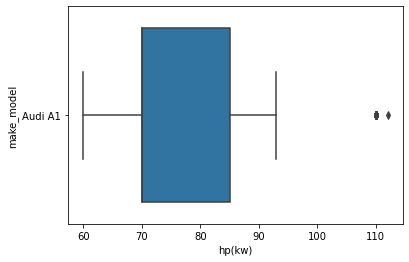

In [41]:
sns.boxplot(data=df[df["make_model"]=="Audi A1"], y="make_model", x="hp(kw)")

##### Audi A3

<AxesSubplot:xlabel='hp(kw)', ylabel='make_model'>

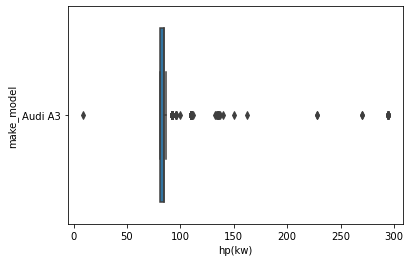

In [42]:
sns.boxplot(data=df[df["make_model"]=="Audi A3"], y="make_model", x="hp(kw)")

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

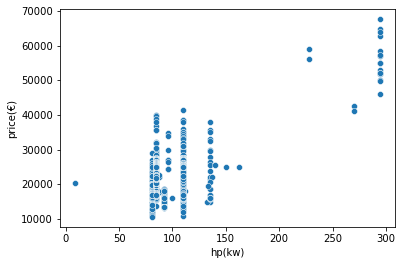

In [43]:
sns.scatterplot(data=df[df["make_model"]=="Audi A3"], x="hp(kw)", y="price(€)")

In [44]:
q3, q1 = np.percentile(df[df["make_model"] == "Audi A3"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(91.0, 75.0)

In [45]:
df[df["make_model"] == "Audi A3"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
3595,Audi A3,Station wagon,63900,VAT deductible,10.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1585.0,front,Benzine,189.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,0.0,Part leather,Black,8.3
3606,Audi A3,Sedans,49900,VAT deductible,17234.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1585.0,4WD,Benzine,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,1.0,Full leather,Black,8.3
3587,Audi A3,Sedans,64900,VAT deductible,35000.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1585.0,front,Benzine,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,1.0,Full leather,Black,8.3
3649,Audi A3,Compact,67600,VAT deductible,37747.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1485.0,4WD,Benzine,189.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.0,2.0,Full leather,Black,8.3
3590,Audi A3,Sedans,62900,VAT deductible,700.0,294.0,Used,1.0,No,Metallic,5.0,5.0,Semi-automatic,2480.0,5.0,1585.0,front,Benzine,194.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0,0.0,Full leather,Black,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Audi A3,Compact,13500,VAT deductible,100832.0,92.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1395.0,4.0,1280.0,front,Benzine,119.0,Euro 6,"Air conditioning,Armrest,Start-stop system",On-board computer,Alloy wheels,"Daytime running lights,Driver drowsiness detec...",6.0,3.0,Cloth,Black,5.1
4236,Audi A3,Station wagon,18200,VAT deductible,19500.0,92.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1395.0,4.0,1280.0,front,Benzine,122.0,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",On-board computer,"Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock with remote control,Driv...",6.0,2.0,Cloth,Black,5.3
2995,Audi A3,Compact,13500,VAT deductible,100832.0,92.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1395.0,4.0,1280.0,front,Benzine,119.0,Euro 6,"Air conditioning,Armrest,Start-stop system",On-board computer,Alloy wheels,"Daytime running lights,Driver drowsiness detec...",6.0,3.0,Cloth,Black,5.1
2994,Audi A3,Compact,13500,VAT deductible,110396.0,92.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1395.0,4.0,1280.0,front,Benzine,119.0,Euro 6,Multi-function steering wheel,On-board computer,Alloy wheels,Tire pressure monitoring system,6.0,3.0,Cloth,Black,5.1


In [46]:
df[df["make_model"] == "Audi A3"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)[:6]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
3913,Audi A3,Sedans,20440,VAT deductible,24000.0,9.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1968.0,4.0,1360.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.0,2.0,Cloth,Black,4.0


In [47]:
df.loc[df.index == 3913, "hp(kw)"]= np.nan

##### Opel Astra

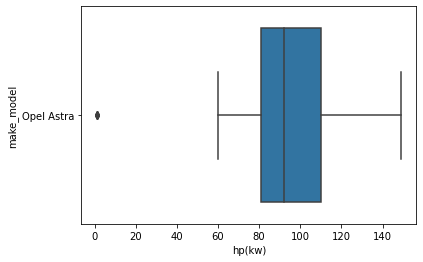

In [48]:
sns.boxplot(data=df[df["make_model"]=="Opel Astra"], y="make_model", x="hp(kw)");

In [49]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Astra"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(153.5, 37.5)

In [50]:
df[df["make_model"] == "Opel Astra"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)


In [51]:
df[df["make_model"] == "Opel Astra"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)[:10]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
6005,Opel Astra,Station wagon,11600,VAT deductible,73860.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,998.0,3.0,1985.0,front,Benzine,123.0,Euro 5,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.0,2.0,Cloth,Grey,5.6
6034,Opel Astra,Station wagon,11600,VAT deductible,76010.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,998.0,4.0,1425.0,front,Benzine,123.0,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.0,2.0,Cloth,Black,5.6
6946,Opel Astra,Station wagon,11900,VAT deductible,70090.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1598.0,4.0,1328.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Roof rack,"Central door lock,Driver-side airbag,Electroni...",6.0,2.0,Other,Other,3.9
7014,Opel Astra,Sedans,11700,VAT deductible,79993.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1364.0,4.0,1350.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,2.0,Other,Other,5.4
7016,Opel Astra,Sedans,11700,VAT deductible,62384.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1364.0,4.0,1350.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,2.0,Other,Other,5.4
7018,Opel Astra,Sedans,11700,VAT deductible,77272.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1364.0,4.0,1350.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,2.0,Other,Other,5.4
7019,Opel Astra,Sedans,11700,VAT deductible,69035.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1364.0,4.0,1350.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.0,2.0,Other,Other,5.4


In [52]:
df.loc[(df["make_model"]=="Opel Astra") & (df["hp(kw)"] < lower_bound), "hp(kw)"] = np.nan

##### Opel Corsa

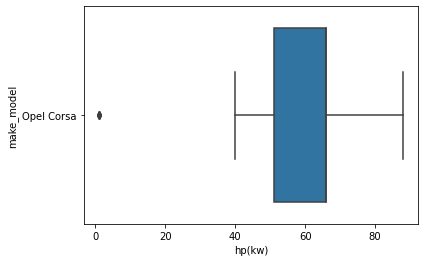

In [53]:
sns.boxplot(data=df[df["make_model"]=="Opel Corsa"], y="make_model", x="hp(kw)");

In [54]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Corsa"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(88.5, 28.5)

In [55]:
df[df["make_model"] == "Opel Corsa"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)


In [56]:
df[df["make_model"] == "Opel Corsa"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
9285,Opel Corsa,Sedans,8300,VAT deductible,58912.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1199.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9287,Opel Corsa,Sedans,8300,VAT deductible,53522.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1199.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9288,Opel Corsa,Sedans,8300,VAT deductible,60386.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1199.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9289,Opel Corsa,Sedans,8300,VAT deductible,59217.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1199.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9290,Opel Corsa,Sedans,8300,VAT deductible,51318.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1199.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9292,Opel Corsa,Sedans,8300,VAT deductible,53390.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1163.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Other,Black,5.35
9299,Opel Corsa,Sedans,8300,Price negotiable,47140.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1229.0,4.0,1163.0,front,Benzine,123.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.0,2.0,Cloth,Grey,5.35


In [57]:
df.loc[(df["make_model"]=="Opel Corsa") & (df["hp(kw)"] < lower_bound), "hp(kw)"] = np.nan

##### Opel Insignia

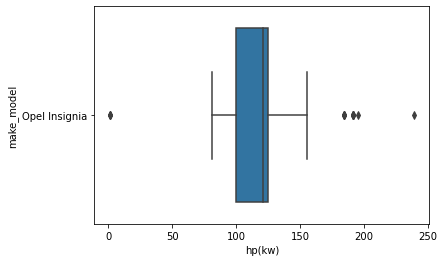

In [58]:
sns.boxplot(data=df[df["make_model"]=="Opel Insignia"], y="make_model", x="hp(kw)");

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

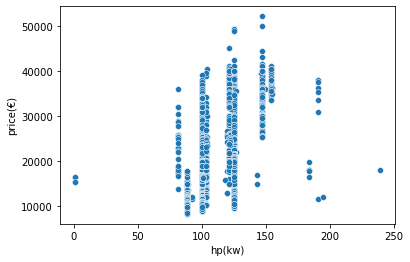

In [59]:
sns.scatterplot(data=df[df["make_model"]=="Opel Insignia"], x="hp(kw)", y="price(€)")

In [60]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Insignia"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(162.5, 62.5)

In [61]:
df[df["make_model"] == "Opel Insignia"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
10513,Opel Insignia,Station wagon,17990,VAT deductible,145000.0,239.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1598.0,4.0,1701.0,4WD,Benzine,253.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,3.0,Full leather,Black,11.0
11117,Opel Insignia,Station wagon,11980,VAT deductible,89982.0,195.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1956.0,4.0,1733.0,front,Diesel,130.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Digital radio,Hands-free e...","Roof rack,Trailer hitch","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,0.0,Cloth,Black,4.9
10789,Opel Insignia,Sedans,11600,VAT deductible,68000.0,191.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1998.0,4.0,1513.0,front,Benzine,197.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,On-board computer","Alloy wheels,Roof rack,Ski bag","ABS,Central door lock with remote control,Driv...",6.0,2.0,Cloth,Black,8.6


In [62]:
df[df["make_model"] == "Opel Insignia"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
10468,Opel Insignia,Station wagon,15300,VAT deductible,77125.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1743.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Roof rack","Alarm system,Central door lock,Driver-side air...",6.0,2.0,Part leather,Grey,5.2
10579,Opel Insignia,Station wagon,16400,VAT deductible,78762.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1901.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Roof rack","Alarm system,Central door lock,Driver-side air...",6.0,2.0,Cloth,Black,5.2
10580,Opel Insignia,Station wagon,16400,VAT deductible,68525.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1901.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Roof rack","Alarm system,Central door lock,Driver-side air...",6.0,2.0,Cloth,Black,5.2
10610,Opel Insignia,Station wagon,15300,VAT deductible,62800.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1743.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Roof rack","Alarm system,Central door lock,Driver-side air...",6.0,2.0,Cloth,Black,5.2


In [63]:
df.loc[df.index == 10513, "hp(kw)"] = np.nan

In [64]:
df.loc[(df["make_model"] == "Opel Insignia") & (df["hp(kw)"] < lower_bound), "hp(kw)"] = np.nan

##### Renault Clio

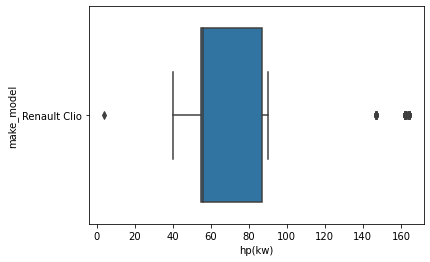

In [65]:
sns.boxplot(data=df[df["make_model"]=="Renault Clio"], y="make_model", x="hp(kw)");

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

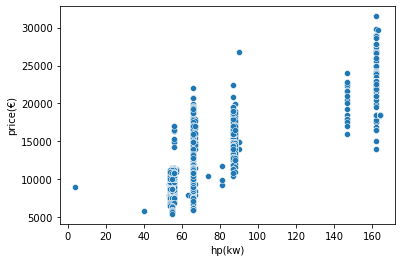

In [66]:
sns.scatterplot(data=df[df["make_model"]=="Renault Clio"], x="hp(kw)", y="price(€)")

In [67]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Clio"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(135.0, 7.0)

In [68]:
df[df["make_model"] == "Renault Clio"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)[:5]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
14415,Renault Clio,Sedans,18490,VAT deductible,10564.0,164.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1618.0,4.0,1279.0,4WD,Benzine,140.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,Cloth,Black,5.9
14422,Renault Clio,Sedans,18490,VAT deductible,10564.0,164.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1618.0,4.0,1279.0,4WD,Benzine,140.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,Cloth,Black,5.9
14417,Renault Clio,Sedans,18490,VAT deductible,10564.0,164.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1618.0,4.0,1279.0,4WD,Benzine,140.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,Cloth,Black,5.9
13870,Renault Clio,Sedans,18490,Price negotiable,10564.0,164.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1618.0,4.0,1280.0,front,Benzine,140.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,Cloth,Black,5.9
13872,Renault Clio,Sedans,18490,Price negotiable,10564.0,164.0,Used,1.0,No,Metallic,4.0,5.0,Automatic,1618.0,4.0,1280.0,front,Benzine,140.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,Cloth,Black,5.9


In [69]:
df[df["make_model"] == "Renault Clio"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
13885,Renault Clio,Compact,8990,VAT deductible,9751.0,4.0,Used,2.0,No,Metallic,5.0,5.0,Manual,1197.0,4.0,1165.0,front,Benzine,123.0,Euro 6,Power windows,On-board computer,Alloy wheels,"ABS,Driver-side airbag,Immobilizer,Passenger-s...",6.0,2.0,Part leather,Black,5.4


In [70]:
df.loc[df.index == 13885, "hp(kw)"] = np.nan

##### Renault Duster

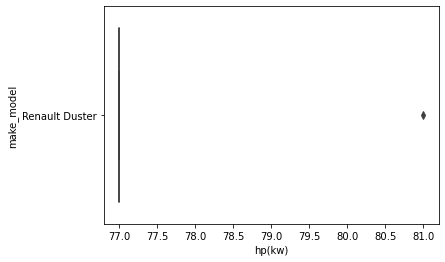

In [71]:
sns.boxplot(data=df[df["make_model"]=="Renault Duster"], y="make_model", x="hp(kw)");

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

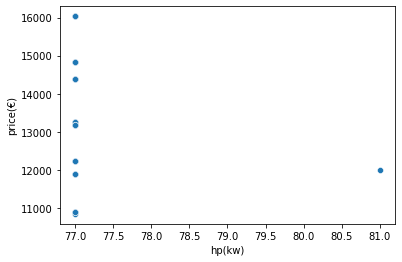

In [72]:
sns.scatterplot(data=df[df["make_model"]=="Renault Duster"], x="hp(kw)", y="price(€)")

In [73]:
df[df["make_model"]=="Renault Duster"]["make_model"].count()

34

In [74]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Duster"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(77.0, 77.0)

In [75]:
df[df["make_model"] == "Renault Duster"][(df["hp(kw)"] > upper_bound)].sort_values(by="hp(kw)", ascending=False)[:3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
14921,Renault Duster,Off-Road,12000,VAT deductible,77442.52,81.0,New,1.0,No,Metallic,5.0,5.0,Manual,1600.0,4.0,1165.0,4WD,Benzine,123.0,Euro 4,"Air conditioning,Electrically heated windshiel...","CD player,Digital radio,MP3,On-board computer,...",Roof rack,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,Cloth,Black,10.0


In [76]:
df.loc[df.index == 14921, "hp(kw)"] = np.nan

##### Renault Espace

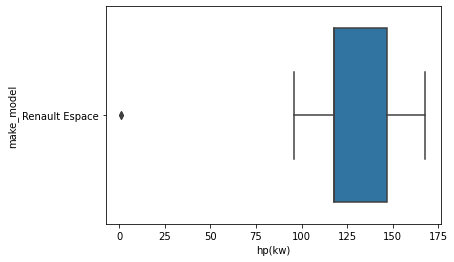

In [77]:
sns.boxplot(data=df[df["make_model"]=="Renault Espace"], y="make_model", x="hp(kw)");

<AxesSubplot:xlabel='hp(kw)', ylabel='price(€)'>

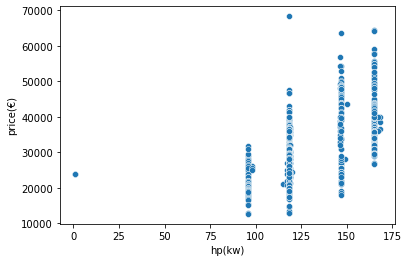

In [78]:
sns.scatterplot(data=df[df["make_model"]=="Renault Espace"], x="hp(kw)", y="price(€)")

In [79]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Espace"]["hp(kw)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(190.5, 74.5)

In [80]:
df[df["make_model"] == "Renault Espace"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
15155,Renault Espace,Sedans,23800,VAT deductible,56340.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1589.0,4.0,2044.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Touch screen,Voice Control","Alarm system,Central door lock,Driver-side air...",7.0,2.0,Part leather,Grey,4.7
15156,Renault Espace,Sedans,23800,VAT deductible,69600.0,1.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1589.0,4.0,2044.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB","Alloy wheels,Touch screen,Voice Control","Alarm system,Central door lock,Driver-side air...",7.0,2.0,Part leather,Grey,4.7


In [81]:
df[df["make_model"] == "Renault Espace"][(df["hp(kw)"] < lower_bound)].sort_values(by="hp(kw)", ascending=False)["hp(kw)"]

15155    1.0
15156    1.0
Name: hp(kw), dtype: float64

In [82]:
df.loc[(df["make_model"] == "Renault Espace") & (df["hp(kw)"] < lower_bound), "hp(kw)"] = np.nan

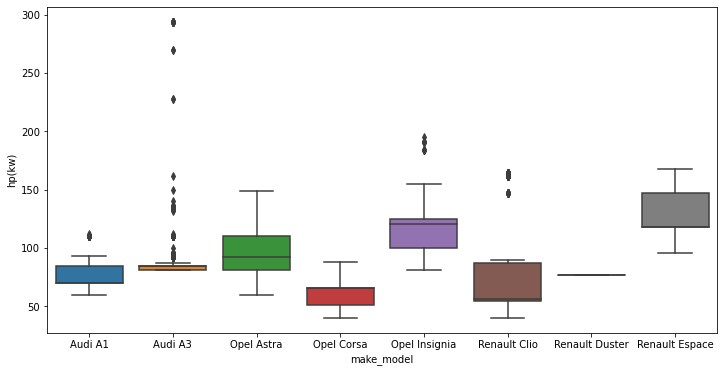

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="hp(kw)");

### 4- previous_owners column

In [84]:
df["previous_owners"].corr(df["price(€)"])

-0.1304727319750901

<AxesSubplot:xlabel='previous_owners', ylabel='age'>

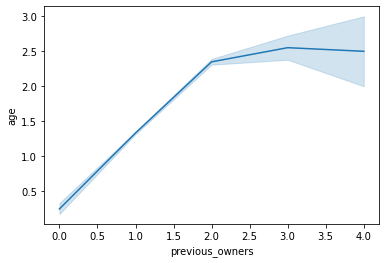

In [85]:
sns.lineplot(data=df, x="previous_owners", y="age")

In [86]:
df["previous_owners"].value_counts()

1.0    14383
2.0     1180
0.0      318
3.0       29
4.0        2
Name: previous_owners, dtype: int64

### 5- num_of_door column

In [87]:
df["num_of_door"].corr(df["price(€)"])

0.16539853376912603

In [88]:
df["num_of_door"].value_counts()

5.0    11723
4.0     3111
3.0      853
2.0      222
1.0        2
7.0        1
Name: num_of_door, dtype: int64

In [89]:
df[(df["num_of_door"] == 7)]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
15202,Renault Espace,Van,21600,Price negotiable,78000.0,118.0,Used,1.0,No,Metallic,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,3.0,Full leather,Brown,4.6


In [90]:
df[(df["make_model"] == "Renault Espace") & (df["body_type"] == "Van")].sort_values(by="num_of_door", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
15202,Renault Espace,Van,21600,Price negotiable,78000.0,118.0,Used,1.0,No,Metallic,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,3.0,Full leather,Brown,4.6
14928,Renault Espace,Van,17500,VAT deductible,141000.0,118.0,Used,1.0,No,Metallic,5.0,7.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,3.0,Full leather,Brown,4.6
15625,Renault Espace,Van,29500,VAT deductible,16500.0,118.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1598.0,4.0,1685.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",7.0,1.0,Part leather,Brown,4.7
15601,Renault Espace,Van,30965,VAT deductible,11.0,165.0,New,1.0,Yes,Metallic,5.0,5.0,Automatic,1798.0,4.0,1659.0,front,Benzine,168.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Touch screen,"ABS,Blind spot monitor,Central door lock,Dayti...",7.0,0.0,Cloth,Black,7.4
15602,Renault Espace,Van,30950,VAT deductible,1.0,118.0,Pre-registered,1.0,No,Metallic,5.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,135.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Drive...",6.0,0.0,Cloth,Black,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,Renault Espace,Van,25490,VAT deductible,49606.0,147.0,Used,2.0,No,Metallic,4.0,7.0,Automatic,1618.0,4.0,1634.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,2.0,Cloth,Black,6.8
15080,Renault Espace,Van,25490,VAT deductible,49606.0,147.0,Used,2.0,No,Metallic,4.0,7.0,Automatic,1618.0,4.0,1634.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,2.0,Cloth,Black,6.8
15081,Renault Espace,Van,25490,VAT deductible,49606.0,147.0,Used,2.0,No,Metallic,4.0,7.0,Automatic,1618.0,4.0,1634.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,2.0,Cloth,Black,6.8
15082,Renault Espace,Van,25490,VAT deductible,49606.0,147.0,Used,2.0,No,Metallic,4.0,7.0,Automatic,1618.0,4.0,1634.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,2.0,Cloth,Black,6.8


In [91]:
df.loc[(df["num_of_door"] == 7), "num_of_door"] = np.nan

In [92]:
df[(df["num_of_door"] == 1)]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
13782,Renault Clio,Compact,8500,VAT deductible,41493.0,55.0,Used,1.0,No,Metallic,1.0,5.0,Manual,1461.0,4.0,1165.0,front,Diesel,106.0,Euro 6,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,3.0,Cloth,Grey,3.3
13785,Renault Clio,Compact,8500,VAT deductible,120620.0,66.0,Used,1.0,No,Metallic,1.0,5.0,Manual,1461.0,4.0,1165.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,Central door lock,6.0,3.0,Cloth,Grey,3.3


In [93]:
df[(df["make_model"] == "Renault Clio") & (df["body_type"] == "Compact")].sort_values(by="num_of_door", ascending=False)

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
14052,Renault Clio,Compact,16295,VAT deductible,100.0,88.0,Pre-registered,1.0,No,Metallic,5.0,5.0,Automatic,1197.0,4.0,1065.0,front,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6.0,1.0,Cloth,Black,5.4
14045,Renault Clio,Compact,16490,Price negotiable,7770.0,87.0,Used,1.0,No,Metallic,5.0,5.0,Automatic,1197.0,4.0,1065.0,front,Benzine,120.0,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,Digital radio,Hands-free equipment,M...","Catalytic Converter,Touch screen","ABS,Central door lock,Daytime running lights,D...",6.0,2.0,Cloth,Black,5.4
14027,Renault Clio,Compact,17900,VAT deductible,15293.0,87.0,Used,2.0,No,Metallic,5.0,5.0,Automatic,1197.0,4.0,1065.0,front,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",On-board computer,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,2.0,Part leather,Black,5.4
14010,Renault Clio,Compact,18440,VAT deductible,150.0,87.0,Pre-registered,1.0,No,Metallic,5.0,5.0,Automatic,1197.0,4.0,1090.0,front,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen","ABS,Central door lock,Daytime running lights,D...",5.0,0.0,Part leather,Black,5.4
14002,Renault Clio,Compact,8750,VAT deductible,47000.0,55.0,Used,1.0,No,Metallic,5.0,5.0,Manual,1461.0,4.0,1090.0,front,Diesel,85.0,Euro 6,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,2.0,Cloth,Black,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14154,Renault Clio,Compact,9880,VAT deductible,26230.0,54.0,Used,1.0,No,Metallic,4.0,5.0,Manual,1149.0,3.0,1165.0,front,Benzine,133.0,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,On-bo...","Touch screen,Voice Control","ABS,Alarm system,Central door lock,Daytime run...",5.0,1.0,Cloth,Black,5.6
14164,Renault Clio,Compact,9900,VAT deductible,6523.0,54.0,Demonstration,1.0,No,Metallic,4.0,5.0,Manual,1149.0,3.0,1052.0,front,Benzine,127.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,On-bo...",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",5.0,1.0,Cloth,Black,5.6
14893,Renault Clio,Compact,10880,VAT deductible,150.0,56.0,Used,1.0,No,Metallic,4.0,5.0,Manual,898.0,3.0,1127.0,front,Benzine,113.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,0.0,Cloth,Black,5.0
13785,Renault Clio,Compact,8500,VAT deductible,120620.0,66.0,Used,1.0,No,Metallic,1.0,5.0,Manual,1461.0,4.0,1165.0,front,Diesel,106.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,Central door lock,6.0,3.0,Cloth,Grey,3.3


In [94]:
df.loc[(df["num_of_door"] == 1), "num_of_door"] = np.nan

In [95]:
df["num_of_door"].value_counts(dropna=False)

5.0    11723
4.0     3111
3.0      853
2.0      222
NaN        3
Name: num_of_door, dtype: int64

In [96]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "num_of_door"] = df.loc[condition, "num_of_door"].fillna(method="ffill").fillna(method="bfill")

df["num_of_door"] = df["num_of_door"].fillna(method="ffill").fillna(method="bfill")

In [97]:
df["num_of_door"].isnull().sum()

0

#### 6- num_of_seat column

In [98]:
df["num_of_seat"].corr(df["price(€)"])

0.2595669660517991

In [99]:
df["num_of_seat"].value_counts()

5.0    14175
4.0     1194
7.0      409
2.0      131
6.0        2
3.0        1
Name: num_of_seat, dtype: int64

In [100]:
df.loc[df["num_of_seat"]==3]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
1636,Audi A1,Compact,23090,VAT deductible,9821.0,NaN,Used,1.0,Yes,Metallic,2.0,3.0,Automatic,1798.0,4.0,1240.0,front,Benzine,134.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,1.0,Part leather,Black,5.8


In [101]:
df.loc[(df["make_model"] == "Audi A1") & (df["body_type"] == "Compact")]["num_of_seat"].value_counts()

5.0    579
4.0    457
6.0      1
3.0      1
Name: num_of_seat, dtype: int64

In [102]:
df.loc[df["num_of_seat"]==6]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
582,Audi A1,Compact,13500,VAT deductible,100000.00,70.0,Used,1.0,No,Metallic,5.0,6.0,Manual,1000.0,4.0,1500.0,front,Benzine,123.0,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,2.0,Cloth,Black,4.7
15890,Renault Espace,Station wagon,42490,VAT deductible,77442.52,147.0,New,1.0,No,Metallic,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,0.0,Cloth,Other,5.7


In [103]:
df.loc[(df["num_of_seat"]==6) | (df["num_of_seat"]==3), "num_of_seat"] = np.nan

In [104]:
df["num_of_seat"].value_counts(dropna=False)

5.0    14175
4.0     1194
7.0      409
2.0      131
NaN        3
Name: num_of_seat, dtype: int64

In [105]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "num_of_seat"] = df.loc[condition, "num_of_seat"].fillna(method="ffill").fillna(method="bfill")

df["num_of_seat"] = df["num_of_seat"].fillna(method="ffill").fillna(method="bfill")

In [106]:
df["num_of_seat"].isnull().sum()

0

### 7- displacement(cc) column

<AxesSubplot:>

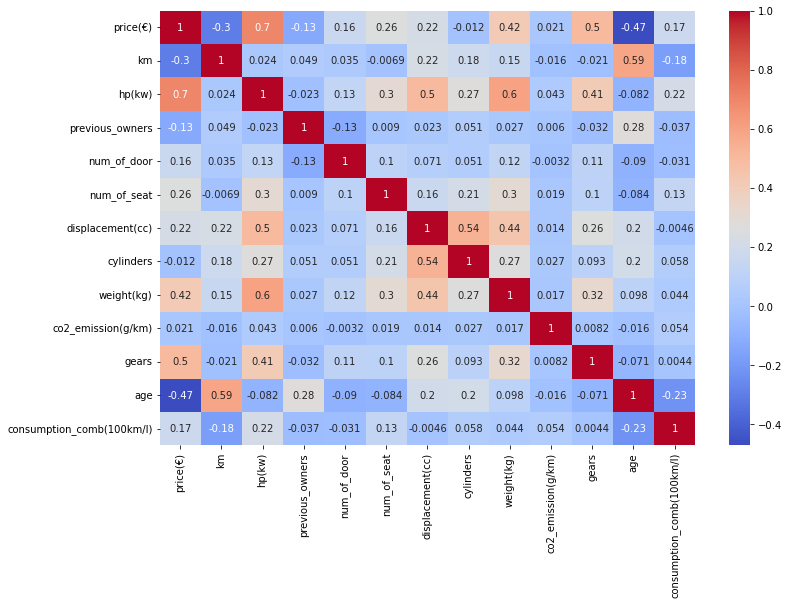

In [107]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
# cylinders, weight, horsepower

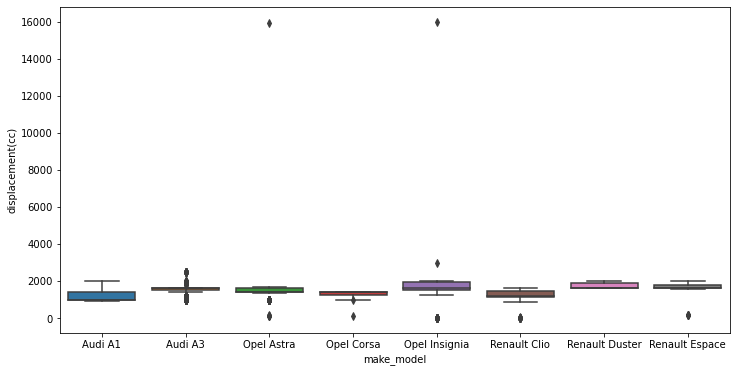

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="displacement(cc)");

##### Opel Astra

In [109]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Astra"]["displacement(cc)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1896.5, 1100.5)

In [110]:
condition = (df["make_model"]=="Opel Astra") & (df["displacement(cc)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].sort_values(by="displacement(cc)")[:6]

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
7809,Opel Astra,Sedans,4.0,1352.0,110.0,139.0
7810,Opel Astra,Sedans,4.0,1352.0,110.0,139.0
7811,Opel Astra,Sedans,4.0,1352.0,110.0,139.0
7812,Opel Astra,Sedans,4.0,1352.0,110.0,139.0
8128,Opel Astra,Station wagon,3.0,1403.0,92.0,140.0
5869,Opel Astra,Sedans,3.0,1410.0,77.0,996.0


In [111]:
df.loc[(df["make_model"]=="Opel Astra") & (df["displacement(cc)"] < 150), "displacement(cc)"] = np.nan

In [112]:
condition = (df["make_model"]=="Opel Astra") & (df["displacement(cc)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
7169,Opel Astra,Station wagon,4.0,1388.0,100.0,15898.0


In [113]:
df.loc[df.index == 7169, "displacement(cc)"] = np.nan

##### Opel Corsa

In [114]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Corsa"]["displacement(cc)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1651.5, 975.5)

In [115]:
condition = (df["make_model"]=="Opel Corsa") & (df["displacement(cc)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
10194,Opel Corsa,Compact,4.0,1162.0,51.0,122.0
8857,Opel Corsa,Compact,4.0,840.0,40.0,973.0


In [116]:
df.loc[(df["make_model"]=="Opel Corsa") & (df["displacement(cc)"] < 130), "displacement(cc)"] = np.nan

##### Opel Insignia

In [117]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Insignia"]["displacement(cc)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(2655.0, 791.0)

In [118]:
condition = (df["make_model"]=="Opel Insignia") & (df["displacement(cc)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
12769,Opel Insignia,Compact,4.0,1441.0,147.0,1.0
12835,Opel Insignia,Sedans,4.0,1341.0,147.0,1.0
12823,Opel Insignia,Station wagon,4.0,1865.0,121.0,1.0
12815,Opel Insignia,Station wagon,4.0,1540.0,100.0,1.0
12800,Opel Insignia,Station wagon,4.0,1522.0,125.0,1.0
12798,Opel Insignia,Station wagon,4.0,1522.0,100.0,1.0
12796,Opel Insignia,Sedans,4.0,1503.0,147.0,1.0
12790,Opel Insignia,Station wagon,4.0,1560.0,100.0,1.0
12786,Opel Insignia,Station wagon,4.0,1387.0,100.0,1.0
12783,Opel Insignia,Compact,4.0,1441.0,147.0,1.0


In [119]:
df.loc[condition, "displacement(cc)"] = np.nan

In [120]:
condition = (df["make_model"]=="Opel Insignia") & (df["displacement(cc)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
10771,Opel Insignia,Station wagon,6.0,2295.0,100.0,2967.0
10932,Opel Insignia,Station wagon,4.0,1733.0,88.0,16000.0


In [121]:
df.loc[(df["make_model"]=="Opel Insignia") & (df["displacement(cc)"] > 15000), "displacement(cc)"] = np.nan

##### Renault Clio

In [122]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Clio"]["displacement(cc)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1929.0, 681.0)

In [123]:
condition = (df["make_model"]=="Renault Clio") & (df["displacement(cc)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
13904,Renault Clio,Sedans,4.0,1052.0,54.0,1.0
14284,Renault Clio,Sedans,4.0,1134.0,54.0,1.0
14314,Renault Clio,Sedans,4.0,900.0,54.0,1.0
14315,Renault Clio,Sedans,4.0,900.0,54.0,1.0
14319,Renault Clio,Sedans,4.0,1165.0,54.0,1.0
14320,Renault Clio,Sedans,4.0,1165.0,54.0,1.0
14321,Renault Clio,Sedans,4.0,1165.0,54.0,1.0
14322,Renault Clio,Sedans,4.0,1165.0,54.0,1.0
14324,Renault Clio,Sedans,4.0,1165.0,54.0,1.0
14325,Renault Clio,Sedans,4.0,1165.0,54.0,1.0


In [124]:
df.loc[condition, "displacement(cc)"] = np.nan

In [125]:
condition = (df["make_model"]=="Renault Clio") & (df["displacement(cc)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)


##### Renault Espace

In [126]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Espace"]["displacement(cc)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(2098.0, 1298.0)

In [127]:
condition = (df["make_model"]=="Renault Espace") & (df["displacement(cc)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
15574,Renault Espace,Van,4.0,1659.0,118.0,160.0
15575,Renault Espace,Van,4.0,1659.0,118.0,160.0
15576,Renault Espace,Van,4.0,1659.0,118.0,160.0
15577,Renault Espace,Van,4.0,1659.0,118.0,160.0
15578,Renault Espace,Van,4.0,1659.0,118.0,160.0
15579,Renault Espace,Van,4.0,1659.0,118.0,160.0


In [128]:
df.loc[condition, "displacement(cc)"] = np.nan

In [129]:
condition = (df["make_model"]=="Renault Espace") & (df["displacement(cc)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="displacement(cc)")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)


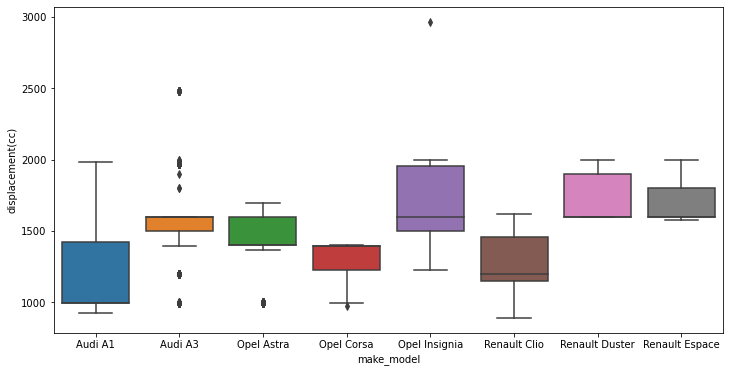

In [130]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="displacement(cc)");

### 8- cylinders column

In [131]:
df["cylinders"].describe()

count    15912.000000
mean         3.782868
std          0.422842
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: cylinders, dtype: float64

<AxesSubplot:>

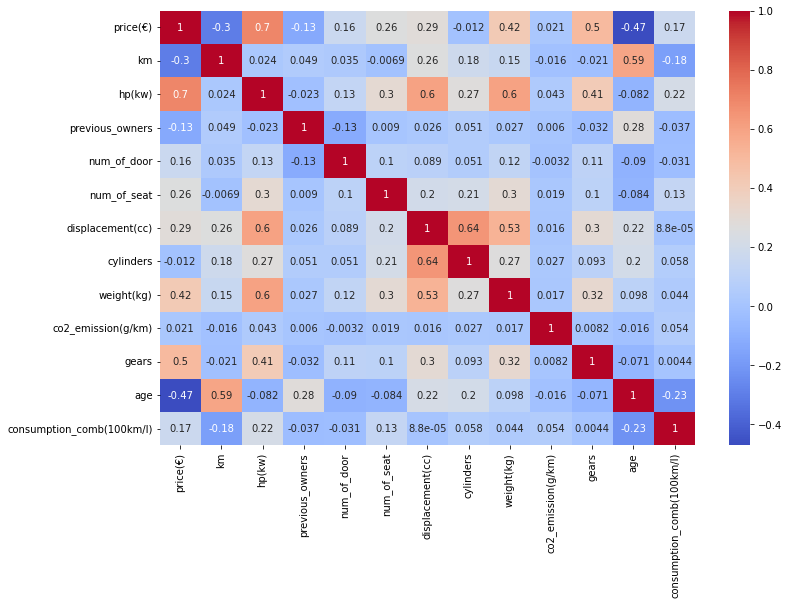

In [132]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
# displacement, weight, horsepower

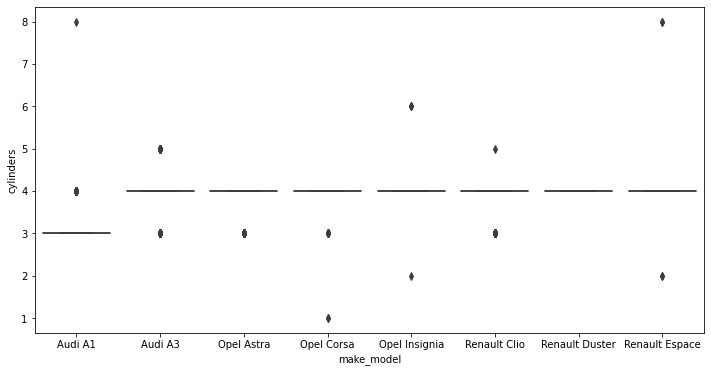

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="cylinders");

##### Audi A1

In [134]:
df.loc[df["make_model"] == "Audi A1", "cylinders"].value_counts()

3.0    2031
4.0     581
8.0       1
Name: cylinders, dtype: int64

In [135]:
condition = (df["make_model"] == "Audi A1") & (df["cylinders"] >= 4) & (df["body_type"] == "Compact")
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="cylinders")

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
40,Audi A1,Compact,4.0,1110.0,60.0,999.0
1102,Audi A1,Compact,4.0,1215.0,92.0,1395.0
1131,Audi A1,Compact,4.0,1200.0,85.0,1598.0
1133,Audi A1,Compact,4.0,1200.0,85.0,1598.0
1137,Audi A1,Compact,4.0,1200.0,85.0,1598.0
...,...,...,...,...,...,...
408,Audi A1,Compact,4.0,1205.0,110.0,1395.0
410,Audi A1,Compact,4.0,1205.0,66.0,1422.0
375,Audi A1,Compact,4.0,1792.0,66.0,1422.0
2393,Audi A1,Compact,4.0,1335.0,70.0,999.0


In [136]:
condition = (df["make_model"] == "Audi A1") & (df["cylinders"] == 8)
df[condition]

,make_model,body_type,price(€),vat,km,hp(kw),type,previous_owners,inspection_new,paint_type,num_of_door,num_of_seat,gearing_type,displacement(cc),cylinders,weight(kg),drive_chain,fuel,co2_emission(g/km),emission_class,comfort_and_convenience,entertaintment_and_media,extras,safety_and_security,gears,age,upholstery_style,upholstery_color,consumption_comb(100km/l)
535,Audi A1,Compact,12990,VAT deductible,41200.0,70.0,Used,1.0,Yes,Metallic,5.0,4.0,Manual,999.0,8.0,1285.0,front,Benzine,331.0,Euro 4,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,3.0,Cloth,Black,13.8


In [137]:
df.loc[df.index == 535, "cylinders"] = np.nan

##### Audi A3

In [138]:
df.loc[df["make_model"] == "Audi A3", "cylinders"].value_counts()

4.0    2472
3.0     602
5.0      21
Name: cylinders, dtype: int64

In [139]:
condition = (df["make_model"] == "Audi A3") & (df["cylinders"] >= 4)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="cylinders").tail(50)

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
3458,Audi A3,Sedans,4.0,1355.0,81.0,1598.0
3457,Audi A3,Sedans,4.0,1355.0,81.0,1395.0
3456,Audi A3,Sedans,4.0,1355.0,81.0,1598.0
3455,Audi A3,Sedans,4.0,1355.0,81.0,1598.0
3461,Audi A3,Sedans,4.0,1360.0,85.0,1598.0
3453,Audi A3,Sedans,4.0,1355.0,81.0,1598.0
3452,Audi A3,Sedans,4.0,1355.0,81.0,1598.0
3451,Audi A3,Sedans,4.0,1365.0,81.0,1598.0
3450,Audi A3,Sedans,4.0,1360.0,81.0,1598.0
3449,Audi A3,Sedans,4.0,1360.0,81.0,1598.0


##### Opel Astra

In [140]:
df.loc[df["make_model"] == "Opel Astra", "cylinders"].value_counts()

4.0    2067
3.0     458
Name: cylinders, dtype: int64

##### Opel Corsa

In [141]:
df.loc[df["make_model"] == "Opel Corsa", "cylinders"].value_counts()

4.0    2205
3.0      10
1.0       2
Name: cylinders, dtype: int64

In [142]:
df.loc[df["cylinders"]== 1.0, "cylinders"] = np.nan

##### Opel Insignia

In [143]:
df.loc[df["make_model"] == "Opel Insignia", "cylinders"].value_counts()

4.0    2594
6.0       3
2.0       1
Name: cylinders, dtype: int64

In [144]:
condition = (df["make_model"] == "Opel Insignia") & (df["cylinders"] >= 1)
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="cylinders").tail(10)

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
11322,Opel Insignia,Station wagon,4.0,1522.0,100.0,1598.0
11323,Opel Insignia,Station wagon,4.0,1522.0,121.0,1490.0
11324,Opel Insignia,Sedans,4.0,1522.0,125.0,1998.0
11325,Opel Insignia,Station wagon,4.0,1701.0,125.0,1598.0
11326,Opel Insignia,Sedans,4.0,1522.0,100.0,1598.0
11319,Opel Insignia,Station wagon,4.0,1716.0,125.0,1956.0
13054,Opel Insignia,Station wagon,4.0,1487.0,154.0,2000.0
10771,Opel Insignia,Station wagon,6.0,2295.0,100.0,2967.0
12897,Opel Insignia,Sedans,6.0,1487.0,100.0,1600.0
10826,Opel Insignia,Station wagon,6.0,1701.0,100.0,1598.0


In [145]:
df.loc[condition, ["make_model", "body_type", "cylinders", "weight(kg)", "hp(kw)", "displacement(cc)"]].\
sort_values(by="cylinders").head(10)

,make_model,body_type,cylinders,weight(kg),hp(kw),displacement(cc)
11342,Opel Insignia,Station wagon,2.0,1560.0,100.0,1598.0
10457,Opel Insignia,Station wagon,4.0,1613.0,100.0,1598.0
12184,Opel Insignia,Station wagon,4.0,1487.0,121.0,1490.0
12185,Opel Insignia,Sedans,4.0,1472.0,103.0,1490.0
12186,Opel Insignia,Station wagon,4.0,1487.0,121.0,1490.0
12187,Opel Insignia,Sedans,4.0,1472.0,103.0,1500.0
12188,Opel Insignia,Station wagon,4.0,1487.0,121.0,1490.0
12189,Opel Insignia,Station wagon,4.0,1633.0,125.0,1956.0
12190,Opel Insignia,Station wagon,4.0,1487.0,103.0,1490.0
12191,Opel Insignia,Station wagon,4.0,1537.0,100.0,1598.0


In [146]:
condition = (df["make_model"] == "Opel Insignia") & ((df["cylinders"] == 2) | (df["cylinders"] == 6))

In [147]:
df.loc[condition, "cylinders"]  = np.nan

##### Renault Clio

In [148]:
df.loc[df["make_model"] == "Renault Clio", "cylinders"].value_counts()

4.0    1456
3.0     382
5.0       1
Name: cylinders, dtype: int64

In [149]:
df.loc[(df["make_model"] == "Renault Clio") & (df["cylinders"]== 5), "cylinders"] = np.nan

##### Renault Duster

In [150]:
df.loc[df["make_model"] == "Renault Duster", "cylinders"].value_counts()

4.0    34
Name: cylinders, dtype: int64

##### Renault Espace

In [151]:
df.loc[df["make_model"] == "Renault Espace", "cylinders"].value_counts()

4.0    987
8.0      2
2.0      2
Name: cylinders, dtype: int64

In [152]:
df.loc[(df["make_model"] == "Renault Espace") & ((df["cylinders"]== 2) | (df["cylinders"] == 8)), "cylinders"] = np.nan

In [153]:
df.groupby("make_model")["cylinders"].value_counts()

make_model      cylinders
Audi A1         3.0          2031
                4.0           581
Audi A3         4.0          2472
                3.0           602
                5.0            21
Opel Astra      4.0          2067
                3.0           458
Opel Corsa      4.0          2205
                3.0            10
Opel Insignia   4.0          2594
Renault Clio    4.0          1456
                3.0           382
Renault Duster  4.0            34
Renault Espace  4.0           987
Name: cylinders, dtype: int64

### 9- weight(kg) column

<AxesSubplot:>

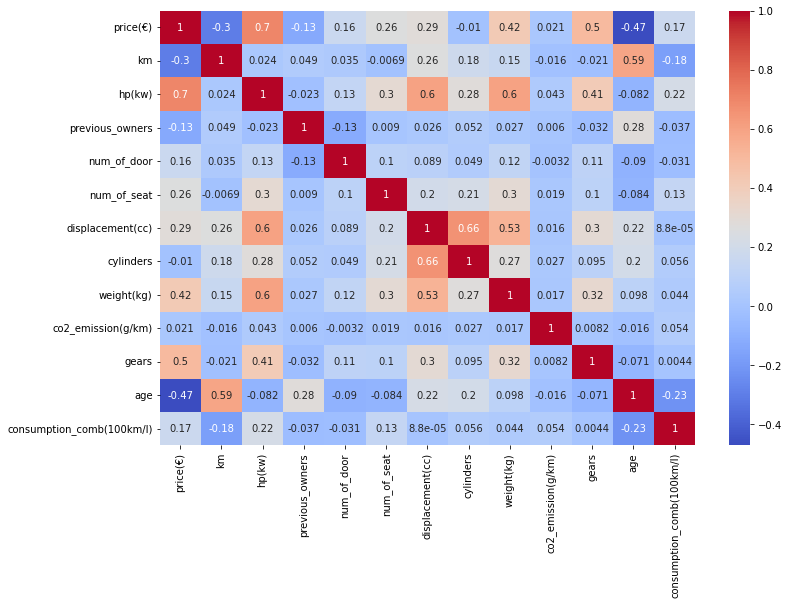

In [154]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
# hp(kw), displacement(cc), gears, price

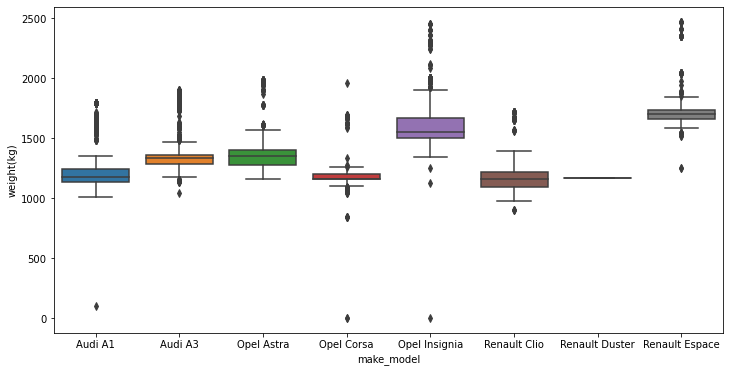

In [155]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="weight(kg)");

##### Audi A1

In [156]:
q3, q1 = np.percentile(df[df["make_model"] == "Audi A1"]["weight(kg)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1397.5, 977.5)

In [157]:
condition = (df["make_model"]=="Audi A1") & (df["weight(kg)"] < lower_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]]

,weight(kg),hp(kw),displacement(cc),gears,price(€)
1143,102.0,70.0,999.0,7.0,19229


In [158]:
df.loc[condition, "weight(kg)"] = np.nan

In [159]:
condition = (df["make_model"]=="Audi A1") & (df["weight(kg)"] > upper_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values("weight(kg)").tail(20)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
343,1792.0,66.0,1422.0,7.0,14990
344,1792.0,66.0,1422.0,7.0,14990
345,1792.0,66.0,1422.0,7.0,14990
346,1792.0,66.0,1422.0,7.0,14990
349,1792.0,66.0,1422.0,7.0,14990
371,1792.0,85.0,1598.0,7.0,14890
351,1792.0,66.0,1422.0,7.0,14990
356,1792.0,66.0,1422.0,7.0,14990
357,1792.0,66.0,1422.0,7.0,14990
358,1792.0,66.0,1422.0,7.0,14990


##### Opel Corsa

In [160]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Corsa"]["weight(kg)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1259.0, 1099.0)

In [161]:
condition = (df["make_model"]=="Opel Corsa") & (df["weight(kg)"] < lower_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values(by="weight(kg)").head(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
8356,1.0,66.0,1398.0,5.0,12945
8355,1.0,66.0,1398.0,5.0,12945
8858,840.0,51.0,1229.0,5.0,7650
8859,840.0,51.0,1229.0,5.0,7650
8861,840.0,66.0,1398.0,5.0,7800
8863,840.0,51.0,1229.0,5.0,7950
8857,840.0,40.0,973.0,5.0,7650
8399,1041.0,66.0,1398.0,5.0,12750
8397,1041.0,66.0,1398.0,5.0,12750
8292,1041.0,66.0,1398.0,6.0,13600


In [162]:
condition = (df["make_model"]=="Opel Corsa") & (df["weight(kg)"] < 10)
df.loc[condition, "weight(kg)"] = np.nan

In [163]:
condition = (df["make_model"]=="Opel Corsa") & (df["weight(kg)"] > upper_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values("weight(kg)").tail(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
8691,1665.0,51.0,1229.0,5.0,7450
8690,1665.0,51.0,1229.0,5.0,7480
8689,1665.0,55.0,1248.0,5.0,7495
8657,1665.0,55.0,1248.0,5.0,7495
8637,1665.0,55.0,1248.0,5.0,7495
8752,1695.0,55.0,1248.0,5.0,6950
8686,1695.0,70.0,1248.0,6.0,7450
9454,1695.0,55.0,1248.0,5.0,8900
8923,1695.0,70.0,1248.0,6.0,7950
9686,1960.0,66.0,1398.0,6.0,14477


##### Opel Insignia

In [164]:
q3, q1 = np.percentile(df[df["make_model"] == "Opel Insignia"]["weight(kg)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1910.5, 1258.5)

In [165]:
condition = (df["make_model"]=="Opel Insignia") & (df["weight(kg)"] < lower_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values(by="weight(kg)").head(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
12779,1.0,121.0,1500.0,6.0,39299
12142,1124.0,121.0,1496.0,6.0,20980
11620,1252.0,81.0,1229.0,5.0,17094


In [166]:
df.loc[df.index==12779, "weight(kg)"] = np.nan

In [167]:
condition = (df["make_model"]=="Opel Insignia") & (df["weight(kg)"] > upper_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values("weight(kg)").tail(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
11752,2355.0,103.0,1490.0,6.0,16400
11750,2355.0,103.0,1364.0,6.0,16900
10882,2400.0,100.0,1598.0,6.0,12675
11077,2400.0,100.0,1598.0,6.0,12650
11078,2400.0,100.0,1598.0,6.0,12595
10881,2400.0,88.0,1598.0,6.0,11500
10646,2450.0,125.0,1956.0,6.0,14500
10642,2450.0,100.0,1598.0,6.0,14800
10639,2450.0,100.0,1598.0,6.0,14850
10638,2450.0,125.0,1956.0,6.0,14900


##### Renault Espace

In [168]:
q3, q1 = np.percentile(df[df["make_model"] == "Renault Espace"]["weight(kg)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1846.5, 1546.5)

In [169]:
condition = (df["make_model"]=="Renault Espace") & (df["weight(kg)"] < lower_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values(by="weight(kg)").head(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
15008,1252.0,118.0,1618.0,6.0,26994
15785,1252.0,165.0,1618.0,6.0,34140
15324,1515.0,96.0,1598.0,6.0,24950
15370,1515.0,96.0,1598.0,6.0,18950
15311,1540.0,96.0,1598.0,6.0,17750
15322,1540.0,96.0,1598.0,6.0,24800
15325,1540.0,96.0,1598.0,6.0,23900
15326,1540.0,96.0,1598.0,6.0,24900
15329,1540.0,96.0,1598.0,6.0,22300
15385,1540.0,118.0,1598.0,6.0,23900


In [170]:
condition = (df["make_model"]=="Renault Espace") & (df["weight(kg)"] > upper_bound)
df.loc[condition, ["weight(kg)", "hp(kw)", "displacement(cc)", "gears", "price(€)"]].sort_values("weight(kg)").tail(10)

,weight(kg),hp(kw),displacement(cc),gears,price(€)
15133,2410.0,147.0,1618.0,7.0,24400
15143,2410.0,147.0,1618.0,7.0,23990
15170,2410.0,147.0,1618.0,7.0,21950
15136,2410.0,147.0,1618.0,7.0,24400
15678,2471.0,118.0,1598.0,6.0,38990
14975,2471.0,118.0,1598.0,6.0,25500
15185,2471.0,118.0,1598.0,6.0,20900
15186,2471.0,117.0,1598.0,6.0,20900
15231,2471.0,118.0,1598.0,6.0,20900
15280,2471.0,118.0,1598.0,6.0,17400


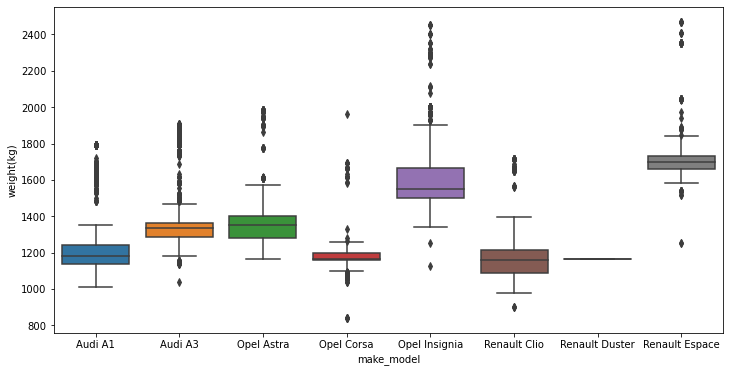

In [171]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make_model", y="weight(kg)");

### 10- co2_emission(g/km) column

In [172]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)'],
      dtype='object')

<AxesSubplot:>

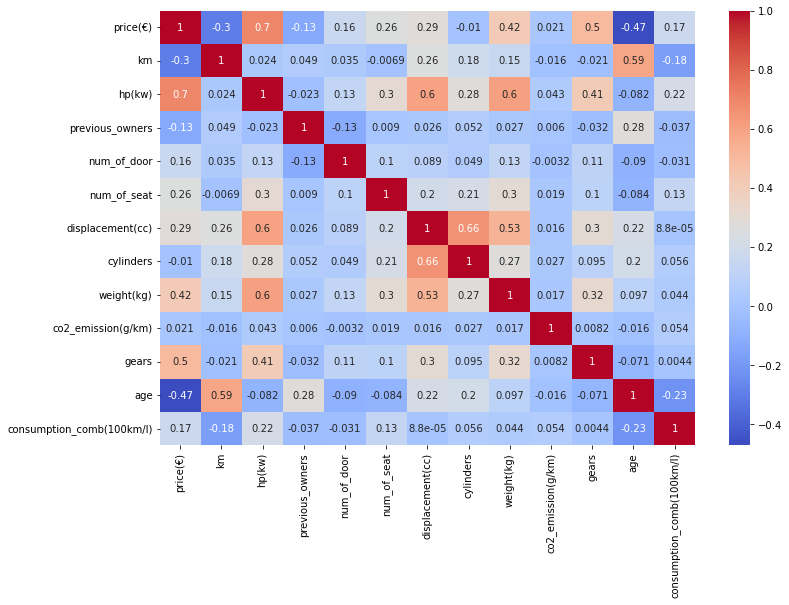

In [173]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [174]:
df.groupby("fuel")["co2_emission(g/km)"].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
Benzine,8547.0,132.341055,338.160686,0.0,113.0,123.0,130.00,14457.0
Diesel,7296.0,110.500548,22.470409,0.0,101.0,106.0,118.00,1060.0
Electric,5.0,36.000000,0.000000,36.0,36.0,36.0,36.00,36.0
LPG/CNG,64.0,101.250000,10.668155,91.0,94.0,97.0,110.75,135.0


In [175]:
df.groupby("emission_class")["co2_emission(g/km)"].describe()

,count,mean,std,min,25%,50%,75%,max
emission_class,,,,,,,,
Euro 4,46.0,167.000000,43.695410,1.0,150.00,186.0,186.0,331.0
Euro 5,100.0,113.390000,18.933107,85.0,97.75,106.0,123.0,175.0
Euro 6,15766.0,122.096283,249.664478,0.0,106.00,116.0,126.0,14457.0


<AxesSubplot:xlabel='fuel', ylabel='co2_emission(g/km)'>

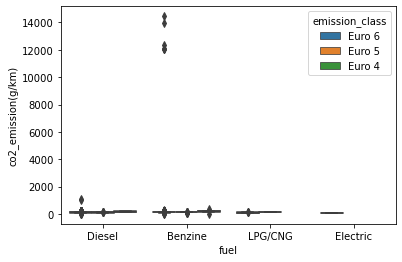

In [176]:
sns.boxplot(data=df, x="fuel", y="co2_emission(g/km)", hue="emission_class")

<AxesSubplot:xlabel='emission_class', ylabel='co2_emission(g/km)'>

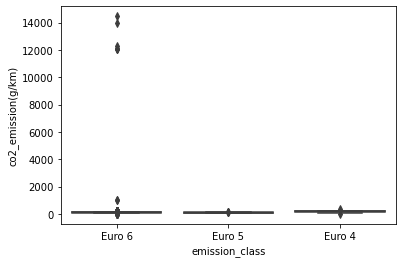

In [177]:
sns.boxplot(data=df, y="co2_emission(g/km)", x="emission_class")

##### Euro 6

In [178]:
q3, q1 = np.percentile(df[df["emission_class"] == "Euro 6"]["co2_emission(g/km)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(156.0, 76.0)

In [179]:
condition = (df["emission_class"]=="Euro 6") & (df["co2_emission(g/km)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)
8217,Opel Astra,Sedans,92.0,Benzine,0.0
10566,Opel Insignia,Station wagon,125.0,Diesel,0.0
6397,Opel Astra,Sedans,81.0,Diesel,5.0
11553,Opel Insignia,Station wagon,125.0,Diesel,5.0
13008,Opel Insignia,Other,100.0,Diesel,5.0
8110,Opel Astra,Station wagon,77.0,Benzine,14.0
3356,Audi A3,Compact,150.0,Electric,36.0
3612,Audi A3,Sedans,110.0,Electric,36.0
3615,Audi A3,Sedans,110.0,Electric,36.0
3617,Audi A3,Sedans,110.0,Electric,36.0


In [180]:
condition = (df["emission_class"]=="Euro 6") & (df["co2_emission(g/km)"] < 36)
df.loc[condition, "co2_emission(g/km)"] = np.nan

In [181]:
condition = (df["emission_class"]=="Euro 6") & (df["co2_emission(g/km)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").tail(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)
12054,Opel Insignia,Station wagon,125.0,Diesel,199.0
10513,Opel Insignia,Station wagon,NaN,Benzine,253.0
4556,Audi A3,Sedans,81.0,Diesel,990.0
4089,Audi A3,Sedans,85.0,Diesel,1060.0
6578,Opel Astra,Station wagon,110.0,Benzine,12087.0
6579,Opel Astra,Station wagon,110.0,Benzine,12087.0
5818,Opel Astra,Sedans,110.0,Benzine,12087.0
8542,Opel Corsa,Compact,66.0,Benzine,12324.0
12343,Opel Insignia,Sedans,103.0,Benzine,13983.0
11888,Opel Insignia,Station wagon,121.0,Benzine,14457.0


In [182]:
condition = (df["emission_class"]=="Euro 6") & (df["co2_emission(g/km)"] > 900)
df.loc[condition, "co2_emission(g/km)"] = np.nan

##### Euro 5

In [183]:
q3, q1 = np.percentile(df[df["emission_class"] == "Euro 5"]["co2_emission(g/km)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(160.875, 59.875)

In [184]:
condition = (df["emission_class"]=="Euro 5") & (df["co2_emission(g/km)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)


In [185]:
condition = (df["emission_class"]=="Euro 5") & (df["co2_emission(g/km)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").tail(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)
5997,Opel Astra,Sedans,85.0,Benzine,167.0
10690,Opel Insignia,Station wagon,143.0,Diesel,169.0
11446,Opel Insignia,Station wagon,125.0,Benzine,170.0
10539,Opel Insignia,Station wagon,143.0,Diesel,175.0


##### Euro 4

In [186]:
q3, q1 = np.percentile(df[df["emission_class"] == "Euro 4"]["co2_emission(g/km)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(240.0, 96.0)

In [187]:
condition = (df["emission_class"]=="Euro 4") & (df["co2_emission(g/km)"] < lower_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)
14902,Renault Duster,Off-Road,77.0,Benzine,1.0


In [188]:
df.loc[df.index == 14902, "co2_emission(g/km)"] = np.nan

In [189]:
condition = (df["emission_class"]=="Euro 4") & (df["co2_emission(g/km)"] > upper_bound)
df.loc[condition, ["make_model", "body_type", "hp(kw)", "fuel", "co2_emission(g/km)"]].sort_values(by="co2_emission(g/km)").tail(10)

,make_model,body_type,hp(kw),fuel,co2_emission(g/km)
535,Audi A1,Compact,70.0,Benzine,331.0


In [190]:
df.loc[df.index == 535, "co2_emission(g/km)"] = np.nan

<AxesSubplot:xlabel='emission_class', ylabel='co2_emission(g/km)'>

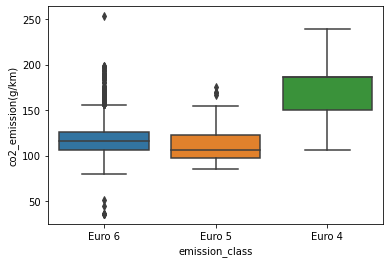

In [191]:
sns.boxplot(data=df, x="emission_class", y="co2_emission(g/km)")

### 11- gears column

<AxesSubplot:>

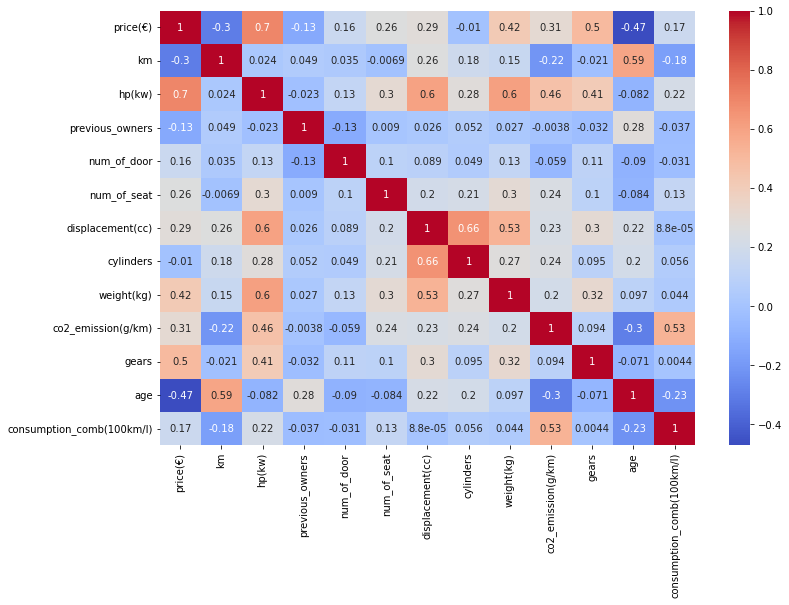

In [192]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
# hp(kw), weight(kg)

In [193]:
df.groupby(["make_model","gearing_type"])["gears"].value_counts()

make_model      gearing_type    gears
Audi A1         Automatic       7.0      1065
                                6.0        44
                                5.0        37
                                8.0         6
                Manual          5.0      1160
                                6.0       222
                                7.0        22
                Semi-automatic  7.0        56
                                6.0         1
Audi A3         Automatic       7.0      1231
                                6.0       129
                Manual          6.0      1455
                                7.0        17
                                5.0         4
                Semi-automatic  7.0       210
                                6.0        49
Opel Astra      Automatic       6.0      1001
                                5.0        89
                                7.0         3
                Manual          6.0      1003
                                5.0       

In [194]:
df.groupby(["make_model"])["gears"].value_counts()

make_model      gears
Audi A1         5.0      1197
                7.0      1143
                6.0       267
                8.0         6
Audi A3         6.0      1633
                7.0      1458
                5.0         4
Opel Astra      6.0      2012
                5.0       510
                7.0         3
Opel Corsa      5.0      1500
                6.0       714
                1.0         1
                2.0         1
                8.0         1
Opel Insignia   6.0      2303
                8.0       282
                5.0        11
                7.0         2
Renault Clio    5.0      1173
                6.0       660
                7.0         4
                1.0         1
                50.0        1
Renault Duster  6.0        34
Renault Espace  6.0       741
                7.0       232
                9.0        11
                3.0         3
                4.0         2
                5.0         2
Name: gears, dtype: int64

In [195]:
df.groupby(["gearing_type"])["gears"].value_counts()

gearing_type    gears
Automatic       6.0      4076
                7.0      2530
                5.0       388
                8.0       286
                9.0        11
                3.0         3
                4.0         2
                1.0         1
Manual          6.0      4141
                5.0      3956
                7.0        45
                8.0         3
                2.0         1
                50.0        1
Semi-automatic  7.0       267
                6.0       147
                5.0        53
                1.0         1
Name: gears, dtype: int64

##### Audi A1

In [196]:
condition = (df["make_model"] == "Audi A1") & (df["gears"] >= 7)
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears").tail(20)

,hp(kw),weight(kg),gearing_type,gears
773,66.0,1250.0,Semi-automatic,7.0
772,85.0,1275.0,Semi-automatic,7.0
771,70.0,1165.0,Semi-automatic,7.0
770,66.0,1220.0,Semi-automatic,7.0
769,NaN,1280.0,Semi-automatic,7.0
768,85.0,1195.0,Semi-automatic,7.0
741,85.0,1255.0,Semi-automatic,7.0
2527,70.0,1230.0,Manual,7.0
767,70.0,1195.0,Semi-automatic,7.0
766,66.0,1195.0,Semi-automatic,7.0


In [197]:
condition = (df["make_model"] == "Audi A1") & (df["gears"] == 8)
df.loc[condition, "gears"] = np.nan

##### Audi A3

In [198]:
condition = (df["make_model"] == "Audi A3") & (df["gears"] >= 5)
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears").head(10)

,hp(kw),weight(kg),gearing_type,gears
4152,81.0,1260.0,Manual,5.0
3290,81.0,1260.0,Manual,5.0
3292,110.0,1455.0,Manual,5.0
3291,81.0,1260.0,Manual,5.0
4367,85.0,1335.0,Manual,6.0
4392,85.0,1260.0,Manual,6.0
4391,85.0,1260.0,Manual,6.0
4390,85.0,1180.0,Manual,6.0
4389,85.0,1335.0,Manual,6.0
4388,110.0,1335.0,Manual,6.0


In [199]:
condition = (df["make_model"] == "Audi A3") & (df["gears"] == 5)
df.loc[condition, "gears"] = np.nan

##### Opel Astra

In [200]:
condition = (df["make_model"] == "Opel Astra") & (df["gears"] >= 6)
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears").tail(10)

,hp(kw),weight(kg),gearing_type,gears
6485,81.0,1425.0,Manual,6.0
6486,70.0,1388.0,Manual,6.0
6487,100.0,1263.0,Manual,6.0
6488,118.0,1435.0,Manual,6.0
6489,100.0,1403.0,Manual,6.0
6492,81.0,1518.0,Manual,6.0
8236,92.0,1278.0,Manual,6.0
5860,100.0,1550.0,Automatic,7.0
5862,110.0,1550.0,Automatic,7.0
5863,100.0,1550.0,Automatic,7.0


##### Opel Corsa

In [201]:
condition = (df["make_model"] == "Opel Corsa") & ((df["gears"] == 1) | (df["gears"] == 2) | (df["gears"] == 8))
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears")

,hp(kw),weight(kg),gearing_type,gears
8921,66.0,1163.0,Semi-automatic,1.0
9812,51.0,1141.0,Manual,2.0
10151,66.0,1163.0,Automatic,8.0


In [202]:
df.loc[condition, "gears"] = np.nan

##### Opel Insignia

In [203]:
condition = (df["make_model"] == "Opel Insignia") & ((df["gears"] == 5) | (df["gears"] == 7))
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears").tail(20)

,hp(kw),weight(kg),gearing_type,gears
10758,101.0,1623.0,Automatic,5.0
10759,101.0,1623.0,Automatic,5.0
10860,101.0,1513.0,Automatic,5.0
10866,100.0,1513.0,Automatic,5.0
10870,101.0,1513.0,Automatic,5.0
11499,100.0,1485.0,Automatic,5.0
11502,100.0,1664.0,Automatic,5.0
11505,125.0,1664.0,Automatic,5.0
11506,125.0,1664.0,Automatic,5.0
11620,81.0,1252.0,Manual,5.0


##### Renault Clio

In [204]:
condition = (df["make_model"] == "Renault Clio") & ((df["gears"] == 50) | (df["gears"] == 7) | (df["gears"] == 1) | (df["gears"] == 6))
df.loc[condition, ["hp(kw)", "weight(kg)","gearing_type", "gears"]].sort_values(by="gears").tail(20)

,hp(kw),weight(kg),gearing_type,gears
13272,87.0,1090.0,Automatic,6.0
13273,88.0,1079.0,Automatic,6.0
13274,87.0,1270.0,Automatic,6.0
13275,88.0,1079.0,Automatic,6.0
13286,87.0,1079.0,Automatic,6.0
13276,88.0,1079.0,Automatic,6.0
14879,66.0,1198.0,Manual,6.0
13278,88.0,1079.0,Automatic,6.0
13279,88.0,1079.0,Automatic,6.0
13280,88.0,1079.0,Automatic,6.0


In [205]:
condition = (df["make_model"] == "Renault Clio") & ((df["gears"] == 50) | (df["gears"] == 1))
df.loc[condition, "gears"] = np.nan

##### Renault Espace

In [206]:
condition = (df["make_model"] == "Renault Espace") & ((df["gears"] == 9) | (df["gears"] == 3))
df.loc[condition, "gears"] = np.nan

### 12- age column

<AxesSubplot:>

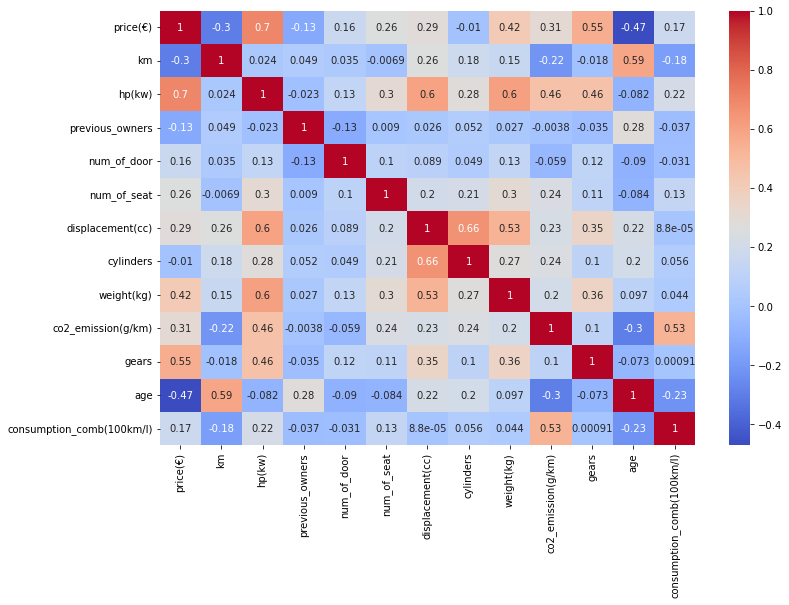

In [207]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
#km

<AxesSubplot:xlabel='age', ylabel='km'>

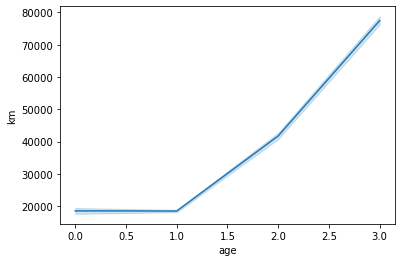

In [208]:
sns.lineplot(data=df, x="age", y="km")

### 13- consumption_comb(100km/l) column

In [209]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'num_of_door',
       'num_of_seat', 'gearing_type', 'displacement(cc)', 'cylinders',
       'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)'],
      dtype='object')

In [210]:
df.groupby("make_model")["consumption_comb(100km/l)"].describe()

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Audi A1,2613.0,4.461672,2.037042,3.0,4.0,4.4,4.8,51.0
Audi A3,3095.0,4.374637,1.395894,1.6,3.9,4.0,4.7,40.0
Opel Astra,2525.0,4.704059,0.882923,0.0,3.9,4.6,5.4,7.5
Opel Corsa,2217.0,5.450947,0.682092,3.0,5.2,5.4,5.9,7.8
Opel Insignia,2598.0,5.384911,1.280792,0.0,4.9,5.5,5.9,55.0
Renault Clio,1839.0,4.741762,2.072310,1.2,3.4,5.0,5.4,54.0
Renault Duster,34.0,9.735294,1.543487,1.0,10.0,10.0,10.0,10.0
Renault Espace,991.0,5.365489,1.636916,4.0,4.7,4.7,6.2,46.0


<AxesSubplot:xlabel='fuel', ylabel='consumption_comb(100km/l)'>

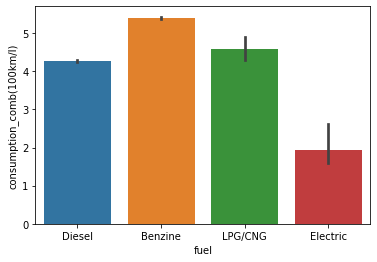

In [211]:
sns.barplot(data=df, x="fuel", y="consumption_comb(100km/l)")

In [212]:
df.groupby("fuel")["consumption_comb(100km/l)"].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
Benzine,8547.0,5.394987,1.494067,0.0,4.8,5.3,5.70,54.0
Diesel,7296.0,4.263199,1.398302,0.0,3.8,4.0,4.60,55.0
Electric,5.0,1.940000,0.760263,1.6,1.6,1.6,1.60,3.3
LPG/CNG,64.0,4.589063,1.247997,3.3,3.4,5.1,5.45,8.3


<AxesSubplot:xlabel='fuel', ylabel='consumption_comb(100km/l)'>

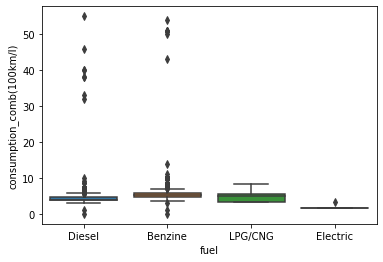

In [213]:
sns.boxplot(data=df, x="fuel", y="consumption_comb(100km/l)")

##### Diesel

In [214]:
q3, q1 = np.percentile(df[df["fuel"] == "Diesel"]["consumption_comb(100km/l)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(5.799999999999999, 2.6)

In [215]:
condition = (df["fuel"]=="Diesel") & (df["consumption_comb(100km/l)"] < lower_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)
13678,Renault Clio,55.0,Diesel,106.0,1.2
10566,Opel Insignia,125.0,Diesel,NaN,0.0


In [216]:
df.loc[condition, "consumption_comb(100km/l)"] = np.nan

In [217]:
condition = (df["fuel"]=="Diesel") & (df["consumption_comb(100km/l)"] > upper_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)
14131,Renault Clio,66.0,Diesel,82.0,32.0
14530,Renault Clio,55.0,Diesel,85.0,33.0
2801,Audi A3,81.0,Diesel,99.0,10.0
4558,Audi A3,81.0,Diesel,99.0,38.0
6826,Opel Astra,100.0,Diesel,101.0,6.0
4102,Audi A3,85.0,Diesel,106.0,40.0
15232,Renault Espace,118.0,Diesel,106.0,6.2
15067,Renault Espace,118.0,Diesel,106.0,46.0
12908,Opel Insignia,125.0,Diesel,106.0,6.0
12647,Opel Insignia,125.0,Diesel,106.0,6.0


In [218]:
condition = (df["fuel"]=="Diesel") & (df["consumption_comb(100km/l)"] > 30)
df.loc[condition, "consumption_comb(100km/l)"] = np.nan

##### Benzine

In [219]:
q3, q1 = np.percentile(df[df["fuel"] == "Benzine"]["consumption_comb(100km/l)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(7.050000000000001, 3.4499999999999993)

In [220]:
condition = (df["fuel"]=="Benzine") & (df["consumption_comb(100km/l)"] < lower_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)
10322,Opel Corsa,51.0,Benzine,134.0,3.0
8217,Opel Astra,92.0,Benzine,NaN,0.0
14902,Renault Duster,77.0,Benzine,NaN,1.0


In [221]:
df.loc[condition, "consumption_comb(100km/l)"] = np.nan

In [222]:
condition = (df["fuel"]=="Benzine") & (df["consumption_comb(100km/l)"] > upper_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)
500,Audi A1,70.0,Benzine,98.0,43.0
14584,Renault Clio,55.0,Benzine,114.0,50.0
2194,Audi A1,70.0,Benzine,116.0,51.0
2196,Audi A1,70.0,Benzine,116.0,51.0
2210,Audi A1,70.0,Benzine,116.0,51.0
2237,Audi A1,70.0,Benzine,116.0,51.0
13179,Renault Clio,88.0,Benzine,120.0,54.0
15684,Renault Espace,118.0,Benzine,123.0,7.4
15812,Renault Espace,165.0,Benzine,123.0,7.6
15814,Renault Espace,165.0,Benzine,123.0,7.6


In [223]:
condition = (df["fuel"]=="Benzine") & (df["consumption_comb(100km/l)"] > 12)
df.loc[condition, "consumption_comb(100km/l)"] = np.nan

##### LPG/CNG

In [224]:
q3, q1 = np.percentile(df[df["fuel"] == "LPG/CNG"]["consumption_comb(100km/l)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(8.525, 0.32499999999999973)

In [225]:
condition = (df["fuel"]=="LPG/CNG") & (df["consumption_comb(100km/l)"] < lower_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)


In [226]:
condition = (df["fuel"]=="LPG/CNG") & (df["consumption_comb(100km/l)"] > upper_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)


##### Electric

In [227]:
q3, q1 = np.percentile(df[df["fuel"] == "Electric"]["consumption_comb(100km/l)"], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(1.6, 1.6)

In [228]:
condition = (df["fuel"]=="Electric") & (df["consumption_comb(100km/l)"] < lower_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)


In [229]:
condition = (df["fuel"]=="Electric") & (df["consumption_comb(100km/l)"] > upper_bound)
df.loc[condition, ["make_model", "hp(kw)", "fuel", "co2_emission(g/km)", "consumption_comb(100km/l)"]].sort_values(by="co2_emission(g/km)").head(10)

,make_model,hp(kw),fuel,co2_emission(g/km),consumption_comb(100km/l)
13397,Renault Clio,56.0,Electric,36.0,3.3


In [230]:
df.loc[df.index==13397, "consumption_comb(100km/l)"] = np.nan

<AxesSubplot:xlabel='fuel', ylabel='consumption_comb(100km/l)'>

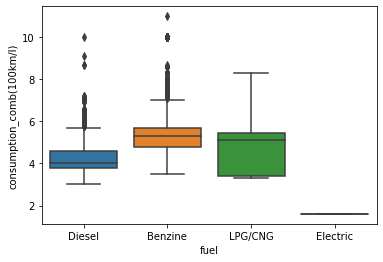

In [231]:
sns.boxplot(data=df, x="fuel", y="consumption_comb(100km/l)")

### Fill Null Values

In [232]:
df.isnull().sum()

make_model                    0
body_type                     0
price(€)                      0
vat                           0
km                            0
hp(kw)                       55
type                          0
previous_owners               0
inspection_new                0
paint_type                    0
num_of_door                   0
num_of_seat                   0
gearing_type                  0
displacement(cc)             53
cylinders                    12
weight(kg)                    4
drive_chain                   0
fuel                          0
co2_emission(g/km)           16
emission_class                0
comfort_and_convenience       0
entertaintment_and_media      0
extras                        0
safety_and_security           0
gears                        29
age                           0
upholstery_style              0
upholstery_color              0
consumption_comb(100km/l)    22
dtype: int64

##### 1- hp(kw)

In [233]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        median = df[condition]["hp(kw)"].median()    
        df.loc[condition, "hp(kw)"] = df.loc[condition, "hp(kw)"].fillna(median) 
df["hp(kw)"] = df["hp(kw)"].fillna(df["hp(kw)"].mode()[0])

In [234]:
df["hp(kw)"].isnull().sum()

0

##### 2- displacement(cc)

In [235]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        for cylinder in df.loc[df["cylinders"].notnull(), "cylinders"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype) & (df.loc[df["cylinders"].notnull(), "cylinders"] == cylinder)
                median = df[condition]["displacement(cc)"].median()    
                df.loc[condition, "displacement(cc)"] = \
                df.loc[condition, "displacement(cc)"].fillna(median)

In [236]:
df["displacement(cc)"].isnull().sum()

0

##### 3- cylinders

In [ ]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype)
                mode = df[condition]["cylinders"].mode()
                df.loc[condition, "cylinders"] = \
                df.loc[condition, "cylinders"].fillna(mode)

In [ ]:
df["cylinders"].isnull().sum()

In [ ]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
            for fueltype in df["fuel"].unique():
                condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) \
                & (df["body_type"] == bodytype)
                df.loc[condition, "cylinders"] = \
                df.loc[condition, "cylinders"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
df["cylinders"].isnull().sum()

##### 4- weight(kg)

In [ ]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["make_model"] == makemodel) & (df["body_type"] == bodytype)
        df.loc[condition, "weight(kg)"] = df.loc[condition, "weight(kg)"].fillna(method="ffill").fillna(method="bfill")

for bodytype in list(df["body_type"].unique()):
    condition = df["body_type"] == bodytype
    df.loc[condition, "weight(kg)"] = df.loc[condition, "weight(kg)"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
df["weight(kg)"].isnull().sum()

##### 5- co2_emission(kg)

In [ ]:
for fueltype in df["fuel"].unique():
    condition = df["fuel"] == fueltype
    median = df[condition]["co2_emission(g/km)"].median()    
    df.loc[condition, "co2_emission(g/km)"] = df.loc[condition, "co2_emission(g/km)"].fillna(median)   

In [ ]:
df["co2_emission(g/km)"].isnull().sum()

##### 6- gears

In [ ]:
for makemodel in df["make_model"].unique():
    for bodytype in df["body_type"].unique():
        condition = (df["body_type"] == bodytype) & (df["make_model"] == makemodel)
        df.loc[condition, "gears"] = df.loc[condition, "gears"].fillna(method="ffill").fillna(method="bfill")

for bodytype in df["body_type"].unique():
    condition = (df["body_type"] == bodytype)
    df.loc[condition, "gears"] = df.loc[condition, "gears"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
df["gears"].isnull().sum()

##### 7- consumption_comb(100km/l)

In [ ]:
for makemodel in df["make_model"].unique():
    for fueltype in df["fuel"].unique():
        for bodytype in df["body_type"].unique():
            condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype) & (df["body_type"] == bodytype)
            median = df[condition]["consumption_comb(100km/l)"].median()    
            df.loc[condition, "consumption_comb(100km/l)"] = \
            df.loc[condition, "consumption_comb(100km/l)"].fillna(median)
                
for makemodel in df["make_model"].unique():
    for fueltype in df["fuel"].unique():
        condition =  (df["make_model"] == makemodel) & (df["fuel"]==fueltype)
        median = df[condition]["consumption_comb(100km/l)"].median()    
        df.loc[condition, "consumption_comb(100km/l)"] = \
        df.loc[condition, "consumption_comb(100km/l)"].fillna(median)
        
df["consumption_comb(100km/l)"] = df["consumption_comb(100km/l)"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
df["consumption_comb(100km/l)"].isnull().sum()

In [ ]:
df = df.reset_index(drop=True)

### Save To Csv Before Dummy Process

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

### Get Dummies For Columns

In [ ]:
df.info()

##### comfort_and_convenience

In [ ]:
com_and_con = df["comfort_and_convenience"].str.get_dummies(sep=",").add_prefix("CC_")

In [ ]:
df = df.join(com_and_con)

##### entertaintment_and_media

In [ ]:
ent_and_med = df["entertaintment_and_media"].str.get_dummies(sep=",").add_prefix("EM_")

In [ ]:
df = df.join(ent_and_med)

##### extras

In [ ]:
extras = df["extras"].str.get_dummies(sep=",").add_prefix("EX_")

In [ ]:
df = df.join(extras)

##### safety_and_security

In [ ]:
safe_and_sec = df["safety_and_security"].str.get_dummies(sep=",").add_prefix("SS_")

In [ ]:
df = df.join(safe_and_sec)

In [ ]:
df.shape

#####  Drop Old Columns

In [ ]:
df.drop(columns=["comfort_and_convenience", "entertaintment_and_media", "extras", "safety_and_security"], inplace=True)

### Get Dummies For Dataframe

In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

In [ ]:
df.shape

### Save To Csv After Dummy Process

In [ ]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

In [ ]:
df.to_csv("final_scout_dummy.csv", index=False)